# TS_smoothing

This notebook includes smoothing of time series for creating better plots to visualize and compare variables

In [1]:
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

In [2]:
## dfjskl

In [3]:
FIGURES = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Figures/'
SMOOTHED_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/smoothed/'

In [5]:
oromia_croplands = pd.read_csv('/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_normalized/oromia_croplands_df_norm.csv', parse_dates=['Time'], index_col='Time')

In [6]:
oromia_croplands

,SM,TMP,P,LST,NDVI,refET
Time,,,,,,
2002-07-01,0.135646,0.052480,0.742506,0.037586,-0.083077,0.056306
2002-07-11,0.544381,-0.904232,0.831454,-0.684467,-0.026029,-0.777299
2002-07-21,1.024050,-1.651244,2.282451,-0.969916,0.021414,-0.294196
2002-08-01,1.238326,-1.839325,1.355295,-1.152511,0.281149,-1.135613
2002-08-11,1.272390,-1.681766,1.303809,-1.152511,0.749501,-0.960297
...,...,...,...,...,...,...
2016-11-11,-0.607893,-0.185363,-0.930699,-0.009177,0.314271,-0.206690
2016-11-21,-0.689993,-0.117030,-0.758587,-0.407309,-0.025562,-1.129312
2016-12-01,-0.820439,-0.639136,-0.966702,0.231113,-0.288986,-0.521770


# Smoothing

In [8]:
#df_ma = edm_test.LST.rolling(15,center=True,closed='both').mean()
#NDVI_loess_5 = pd.DataFrame(lowess(oromia_crops.NDVI, np.arange(len(oromia_crops.NDVI)), frac=0.05)[:, 1], index=oromia_crops.index, columns=['NDVI'])
P_loess = pd.DataFrame(lowess(oromia_croplands.P, np.arange(len(oromia_croplands.P)), frac=0.02)[:, 1], index=oromia_croplands.index, columns=['P'])
LST_loess = pd.DataFrame(lowess(oromia_croplands.LST, np.arange(len(oromia_croplands.LST)), frac=0.02)[:, 1], index=oromia_croplands.index, columns=['LST'])
RefET_loess = pd.DataFrame(lowess(oromia_croplands.refET, np.arange(len(oromia_croplands.refET)), frac=0.02)[:, 1], index=oromia_croplands.index, columns=['RefET'])
SM_loess = pd.DataFrame(lowess(oromia_croplands.SM, np.arange(len(oromia_croplands.SM)), frac=0.02)[:, 1], index=oromia_croplands.index, columns=['SM'])
TMP_loess = pd.DataFrame(lowess(oromia_croplands.TMP, np.arange(len(oromia_croplands.TMP)), frac=0.02)[:, 1], index=oromia_croplands.index, columns=['TMP'])

In [9]:
oromia_crops_smoothed_df = pd.DataFrame({'SM': SM_loess['SM'],
                   'TMP': TMP_loess['TMP'],
                   'P':P_loess['P'],
                   'LST':LST_loess['LST'],
                   'NDVI':oromia_croplands['NDVI'],
                   'RefET':RefET_loess['RefET']
                  }, index=oromia_croplands.index)

In [17]:
oromia_crops_smoothed_df.index

DatetimeIndex(['2002-07-01', '2002-07-11', '2002-07-21', '2002-08-01',
               '2002-08-11', '2002-08-21', '2002-09-01', '2002-09-11',
               '2002-09-21', '2002-10-01',
               ...
               '2016-09-21', '2016-10-01', '2016-10-11', '2016-10-21',
               '2016-11-01', '2016-11-11', '2016-11-21', '2016-12-01',
               '2016-12-11', '2016-12-21'],
              dtype='datetime64[ns]', name='Time', length=522, freq=None)

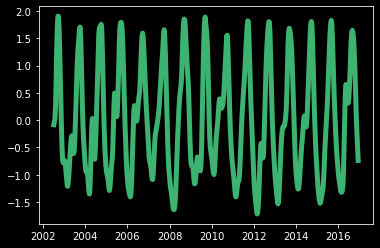

In [16]:
fig = plt.figure 
ax = plt.axes()
ax.plot(oromia_croplands['NDVI'], linewidth = 5, color = 'mediumseagreen')

In [11]:
oromia_crops_smoothed_df.to_csv(SMOOTHED_DIR + 'oromia_croplands_smoothed.csv')

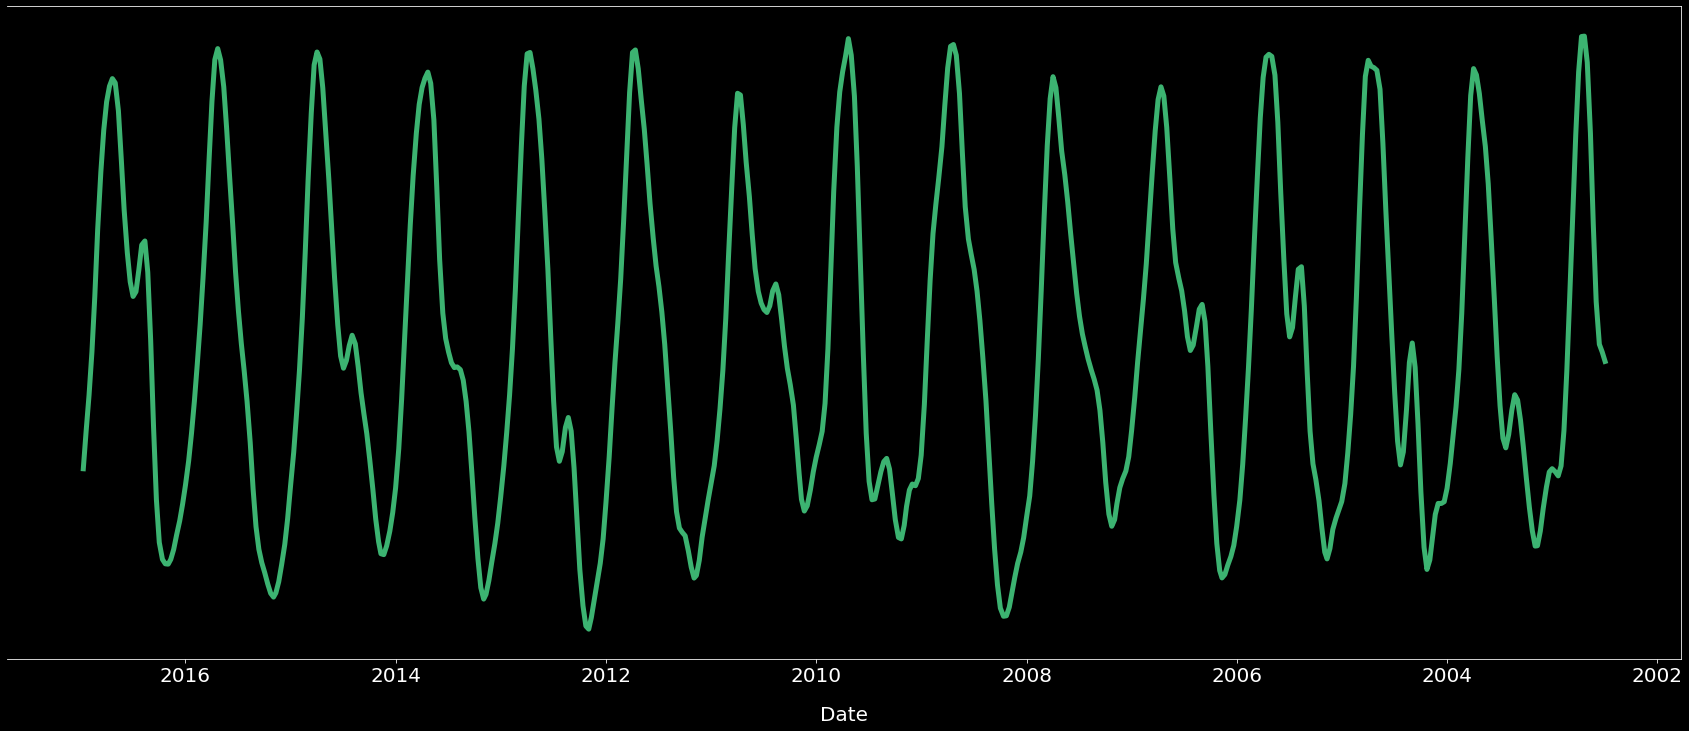

In [13]:
plt.style.use('dark_background')
fig = plt.figure(figsize = (30,12))
ax = plt.axes()

ax.plot(oromia_croplands['NDVI'], linewidth = 5, color = 'mediumseagreen')
plt.xlabel('Date', fontsize = 20, labelpad = 20)
plt.yticks([])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visbible(False)
ax.spines['left'].set_visible(False)
#plt.axis('off')
plt.gca().invert_xaxis()
plt.savefig(FIGURES + 'ndvi_ts_normalized.pdf')

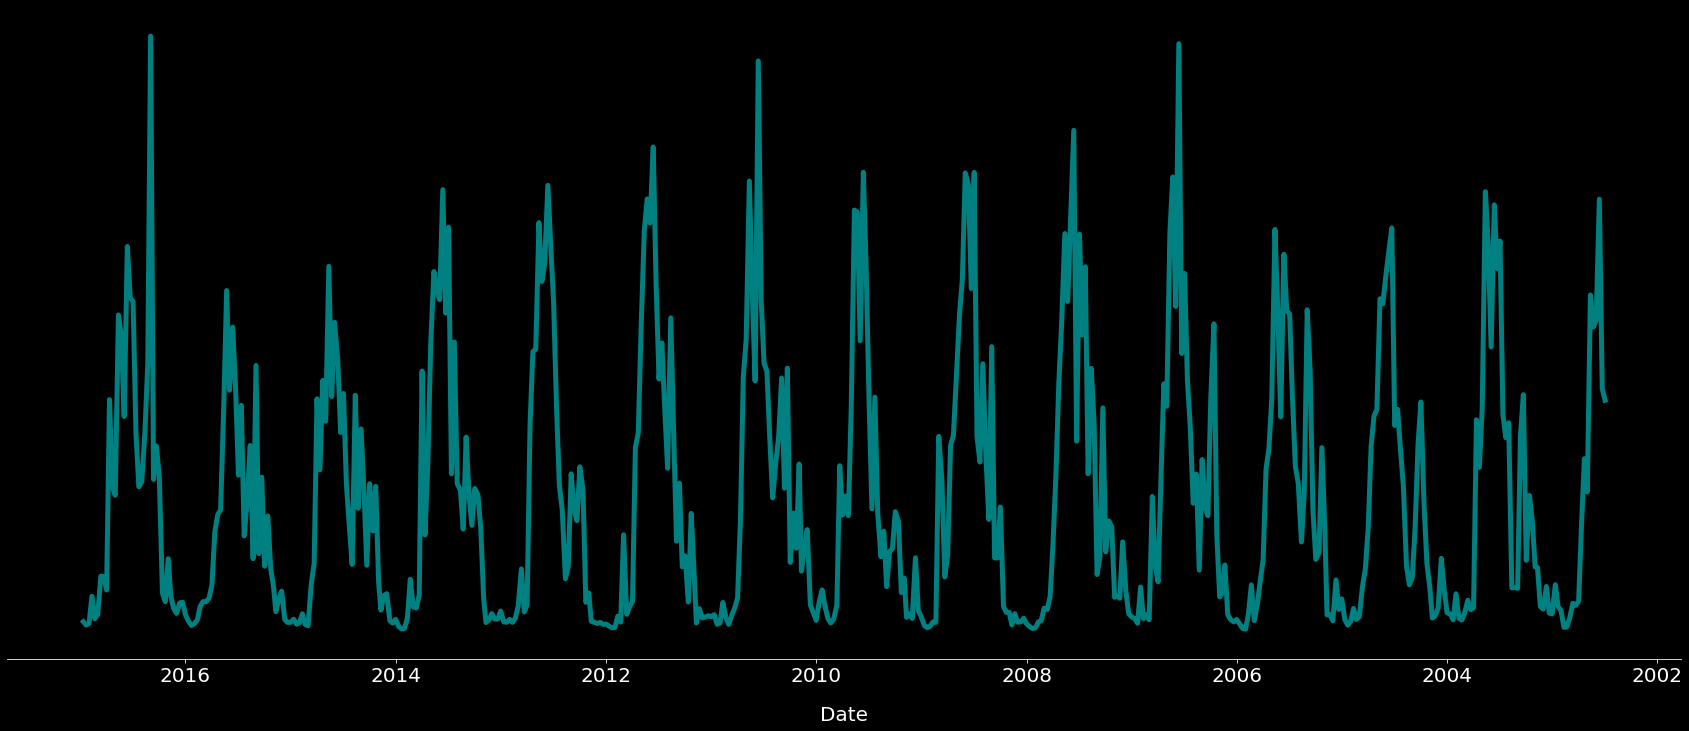

In [76]:
plt.style.use('dark_background')
fig = plt.figure(figsize = (30,12))
ax = plt.axes()

ax.plot(oromia_croplands['P'], linewidth = 5, color = 'teal')
plt.xlabel('Date', fontsize = 20, labelpad = 20)
plt.yticks([])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visbible(False)
ax.spines['left'].set_visible(False)
#plt.axis('off')
plt.gca().invert_xaxis()
plt.savefig(FIGURES + 'sm_ts_normalized.pdf')

In [ ]:
plt.style.use('dark_background')
fig = plt.figure(figsize = (30,12))
ax = plt.axes()

ax.plot(oromia_croplands['NDVI'], linewidth = 5, color = 'mediumseagreen')
plt.xlabel('Date', fontsize = 20, labelpad = 20)
plt.yticks([])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visbible(False)
ax.spines['left'].set_visible(False)
#plt.axis('off')
plt.gca().invert_xaxis()
plt.savefig(FIGURES + 'ndvi_ts_normalized.pdf')

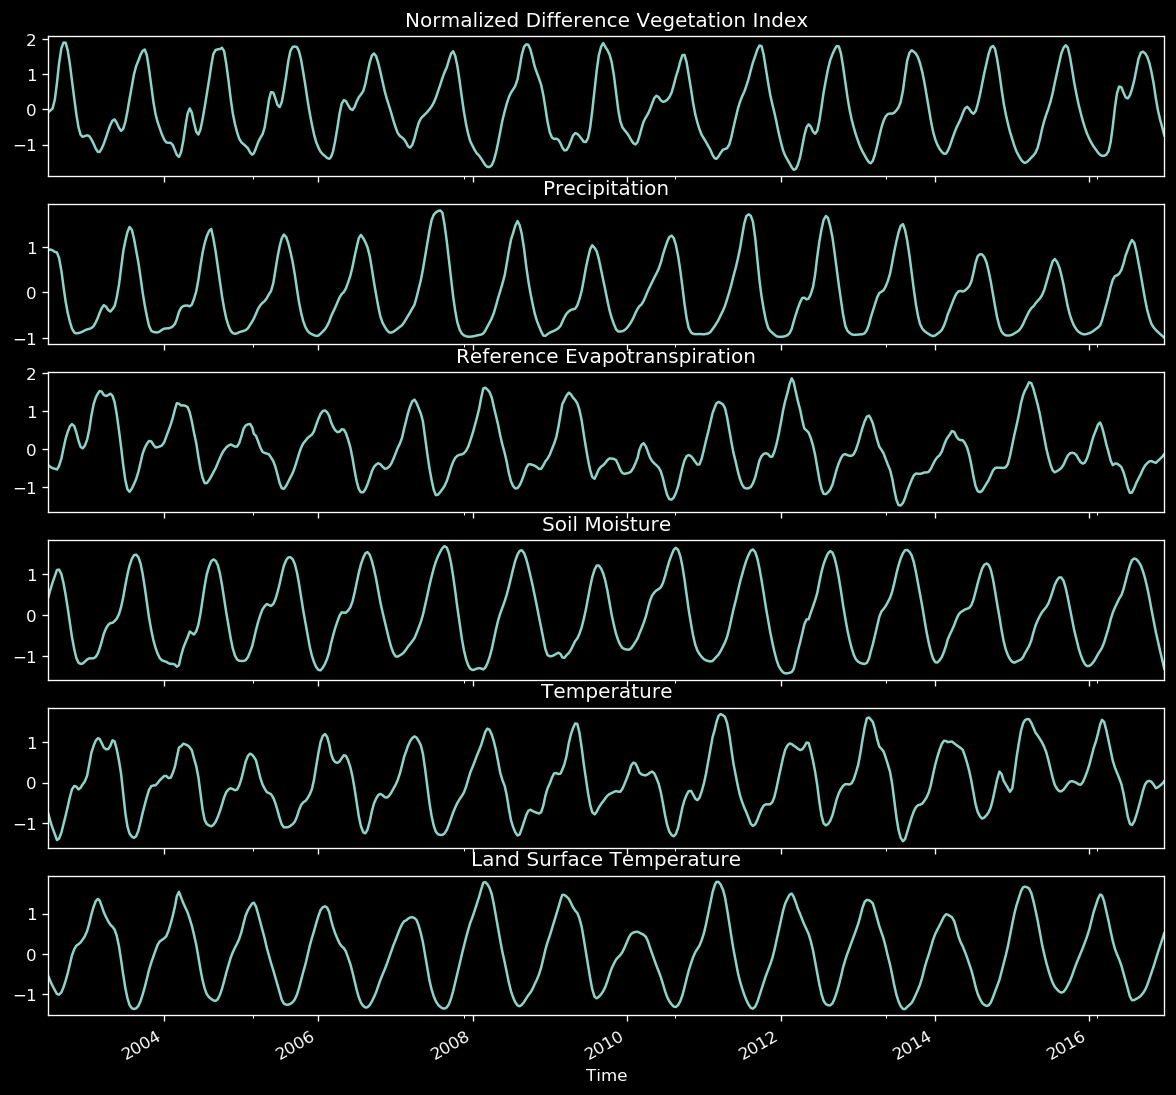

In [14]:
plt.style.use('dark_background')
fig, axes = plt.subplots(6,1, figsize=(12, 12), sharex=True, dpi=120)
oromia_croplands['NDVI'].plot(ax=axes[0], title='Normalized Difference Vegetation Index')
P_loess['P'].plot(ax=axes[1], title='Precipitation')
RefET_loess['RefET'].plot(ax=axes[2], title='Reference Evapotranspiration')
SM_loess['SM'].plot(ax=axes[3], title='Soil Moisture')

#oromia_crops['TMP'].plot(ax=axes[2], title='Normalized Difference Vegetation Index')
TMP_loess['TMP'].plot(ax=axes[4], title='Temperature')
LST_loess['LST'].plot(ax=axes[5], title='Land Surface Temperature')
#plt.savefig('oromia_ts_compare.png')

In [ ]:
NDVI = oromia_crops['NDVI'].to_list()
P = P_loess_5['P'].to_list()
SM = SM_loess_5['SM'].to_list()
TMP = TMP_loess_5['TMP'].to_list()
PET = PET_loess_5['PET'].to_list()
LST = LST_loess_5['LST'].to_list()

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

T = np.array([6, 7, 8, 9, 10, 11, 12])
xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max



spl = make_interp_spline(T, power, k=3) #BSpline object
power_smooth = spl(xnew)

plt.plot(xnew,power_smooth)
plt.show()

In [ ]:
import pandas as pd

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(NDVI, P, LST, 'gray')

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
ax.scatter3D(TMP,P,NDVI, c = NDVI, cmap='Greens')
ax.set_xlabel('Temperature')
ax.set_ylabel('Precipitation')
ax.set_zlabel('NDVI')
ax.view_init(30,10)
plt.savefig('3D_ndvi.png', dpi=100)

In [ ]:
NDVI

In [ ]:
from sklearn import preprocessing

In [ ]:
names = edm_test[2:5].columns
# scaler = preprocessing.StandardScaler()
# scaled_df = scaler.fit_transform(edm_test[2:5])
# scaled_df = pd.DataFrame(scaled_df, columns=names)